In [28]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the LTE KPI Excel file
df = pd.read_excel(r'C:\Users\ezagrri\LearnBay\datasets\LTE_KPI_DATA.xlsx')

In [5]:
df.head(10)

,Sector,Site ID,Index,Start Time,End Time,Query Granularity,Subnetwork,Subnetwork Name,ManagedElement,ManagedElement Name,...,[LTE]Average PHY DL Throughput(Mbps),[LTE]Maximum PHY UL Throughput(Mbps),[LTE]Minimum PHY UL Throughput(Mbps),[LTE]Average PHY UL Throughput(Mbps),E_4G_RRC Drop Rate,E_4G_E-RAB Drop Rate,E_4G_Downlink IP Throughput(Mbps),E_4G_DL PRB Utilization Rate,Cell DL Traffic(MByte),Data Integrity
0,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,5.1070,4.7671,0.0488,0.8055,0.0008,0.0000,3.3748,0.6028,1889.9612,1.0
1,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.0066,4.7030,0.0003,0.3598,0.0014,0.0000,3.2924,0.4199,732.5299,1.0
2,1432A SEC 3,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.5850,2.2280,0.0000,0.4007,0.0000,0.0000,7.7894,0.1003,202.0574,1.0
3,1432A SEC 4,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.8774,1.2475,0.0000,0.0675,0.0000,0.0000,21.2716,0.0931,345.3261,1.0
4,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,22.0502,21.8013,2.5141,5.3262,0.0009,0.0001,0.7956,0.9818,8253.9837,1.0
5,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.5804,9.2878,0.0030,0.5908,0.0004,0.0006,9.0803,0.2040,949.5160,1.0
6,1432A SEC 3,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,4.3238,3.7616,0.0036,0.6286,0.0016,0.0017,9.1184,0.2788,1661.2424,1.0
7,1432A SEC 4,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,9.3113,40.4924,0.1192,1.7502,0.0003,0.0004,7.4910,0.4840,3491.2886,1.0
8,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,14.3584,23.6669,0.4421,2.8189,0.0005,0.0000,2.7324,0.7485,5155.8077,1.0
9,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.5649,1.8412,0.0000,0.2643,0.0072,0.0009,9.2469,0.2164,926.4011,1.0


In [6]:
# Check and clean data
df = df.dropna(subset=['E_4G_PSSR'])  # Remove rows where E_4G_PSSR is NaN
df['E_4G_PSSR'] = pd.to_numeric(df['E_4G_PSSR'], errors='coerce')  # Ensure numeric type

In [15]:
#1. Z-Score Anomaly Detection
df['z_score'] = zscore(df['E_4G_PSSR'])
df['z_score']

0       0.505135
1       0.204667
2       0.088357
3       0.592368
4       0.514827
          ...   
4219   -0.008568
4220   -1.636910
4221   -0.153956
4222   -0.677351
4223    0.030202
Name: z_score, Length: 4224, dtype: float64

In [16]:
df['z_anomaly'] = df['z_score'].abs() > 3  # Mark True where Z-score > 3

In [17]:
df.loc[df['z_anomaly'] == True, 'E_4G_PSSR']

398     0.8791
399     0.9615
406     0.9386
410     0.9506
418     0.9564
         ...  
3977    0.9177
3992    0.9473
3994    0.9616
4004    0.9530
4006    0.9427
Name: E_4G_PSSR, Length: 74, dtype: float64

In [18]:
# ------------------------
# 2. IQR Anomaly Detection
# ------------------------
Q1 = df['E_4G_PSSR'].quantile(0.25)

In [19]:
print(Q1)

0.9926


In [20]:
Q3 = df['E_4G_PSSR'].quantile(0.75)


In [21]:
print(Q3)

0.9994


In [22]:
IQR = Q3 - Q1
print(IQR)

0.006799999999999917


In [23]:
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

0.9824000000000002


In [24]:
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

1.0095999999999998


In [25]:
df['iqr_anomaly'] = (df['E_4G_PSSR'] < lower_bound) | (df['E_4G_PSSR'] > upper_bound)

In [26]:
df.loc[df['iqr_anomaly'] == True, 'E_4G_PSSR']

33      0.9797
129     0.9799
133     0.9808
141     0.9725
142     0.9784
         ...  
4181    0.9776
4193    0.9673
4205    0.9785
4217    0.9728
4220    0.9770
Name: E_4G_PSSR, Length: 397, dtype: float64

In [27]:
df.to_excel(r'C:\Users\ezagrri\LearnBay\datasets\LTE_KPI_Analyzed_With_Anomalies.xlsx', index=False)
print("Anomaly analysis complete. Results saved to 'LTE_KPI_Analyzed_With_Anomalies.xlsx'")

Anomaly analysis complete. Results saved to 'LTE_KPI_Analyzed_With_Anomalies.xlsx'


In [29]:
# Optional: set style for seaborn
sns.set(style="whitegrid")

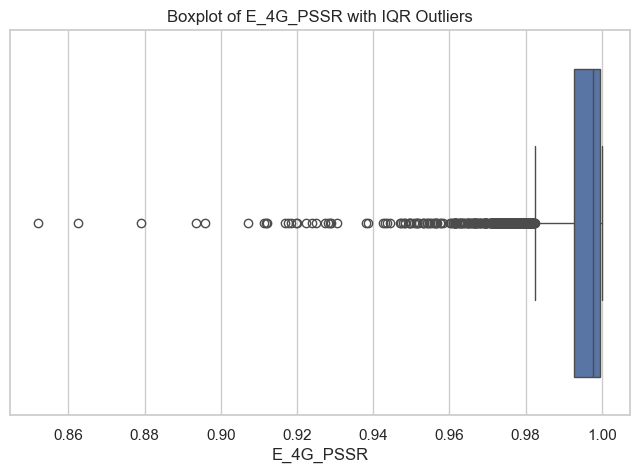

In [30]:
# 1. Boxplot for E_4G_PSSR (IQR visualization)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['E_4G_PSSR'])
plt.title('Boxplot of E_4G_PSSR with IQR Outliers')
plt.xlabel('E_4G_PSSR')
plt.show()

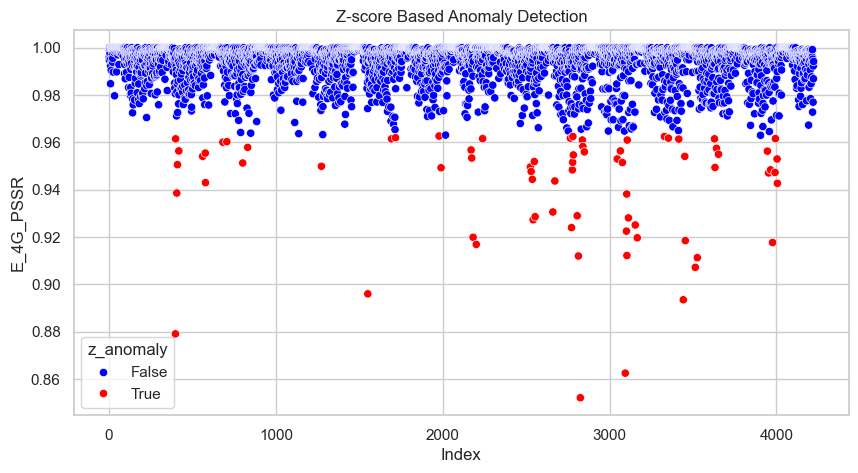

In [31]:
# 3. Scatter Plot - Z-score Anomalies
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=df.index, y='E_4G_PSSR', hue='z_anomaly', palette={True: 'red', False: 'blue'})
plt.title('Z-score Based Anomaly Detection')
plt.xlabel('Index')
plt.ylabel('E_4G_PSSR')
plt.show()

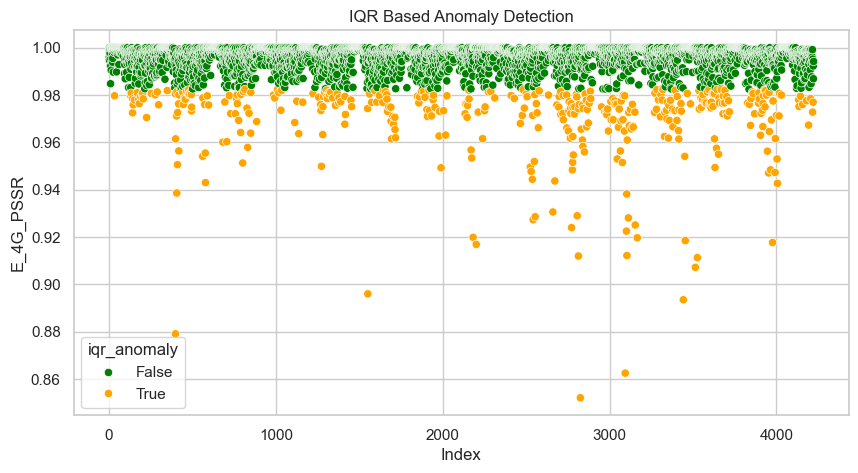

In [32]:
# 4. Scatter Plot - IQR Anomalies
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=df.index, y='E_4G_PSSR', hue='iqr_anomaly', palette={True: 'orange', False: 'green'})
plt.title('IQR Based Anomaly Detection')
plt.xlabel('Index')
plt.ylabel('E_4G_PSSR')
plt.show()

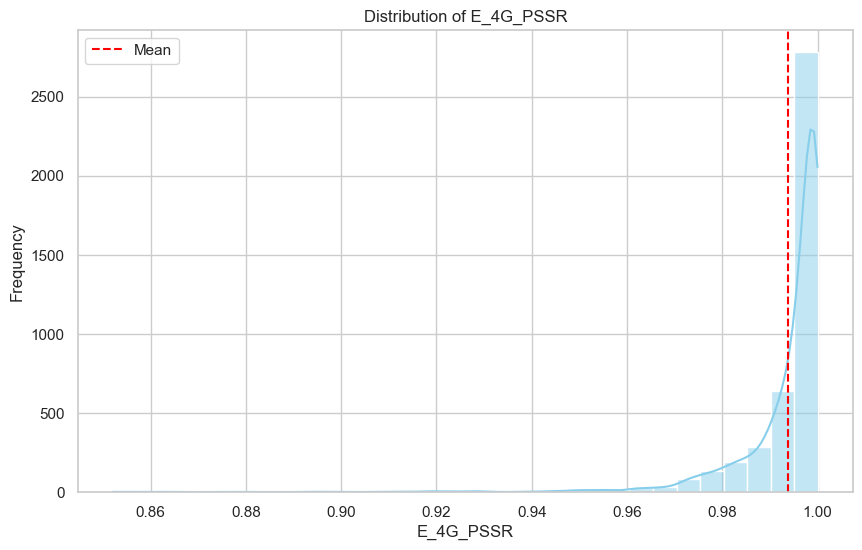

In [33]:
# 2. Histogram with Z-score threshold indicators
plt.figure(figsize=(10, 6))
sns.histplot(df['E_4G_PSSR'], bins=30, kde=True, color='skyblue')
plt.axvline(df['E_4G_PSSR'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Distribution of E_4G_PSSR')
plt.xlabel('E_4G_PSSR')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\ezagrri\AppData\Local\Temp\ipykernel_20472\662196717.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')


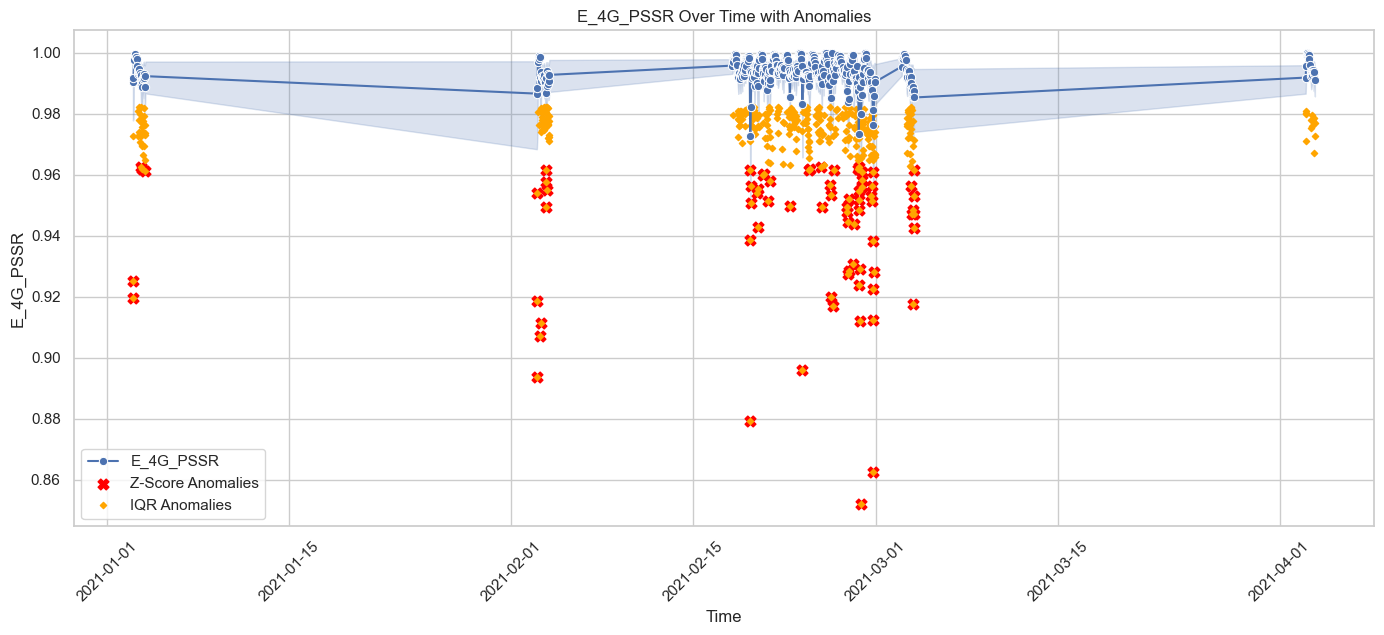

In [38]:
df = pd.read_excel(r'C:\Users\ezagrri\LearnBay\datasets\LTE_KPI_Analyzed_With_Anomalies.xlsx')

# Ensure 'Start Time' is in datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')

# Sort by time
df = df.sort_values('Start Time')

# Plot E_4G_PSSR values over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Start Time', y='E_4G_PSSR', label='E_4G_PSSR', marker='o')

# Highlight Z-score anomalies
z_anomalies = df[df['z_anomaly']]
plt.scatter(z_anomalies['Start Time'], z_anomalies['E_4G_PSSR'], color='red', label='Z-Score Anomalies', s=60, marker='X')

# Highlight IQR anomalies
iqr_anomalies = df[df['iqr_anomaly']]
plt.scatter(iqr_anomalies['Start Time'], iqr_anomalies['E_4G_PSSR'], color='orange', label='IQR Anomalies', s=10, marker='D')

# Formatting
plt.title("E_4G_PSSR Over Time with Anomalies")
plt.xlabel("Time")
plt.ylabel("E_4G_PSSR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

# Save the plot
plt.savefig("PSSR_Anomalies_Single_Site.png")
plt.show()